In [1]:
using Clapeyron
using Plots
using CSV
using DataFrames
using LaTeXStrings
using Measures

In [15]:
model_mix = SAFTgammaMie([("MEA",["NH2"=>1, "CH2"=>1, "CH2OH"=>1]),("Water",["H2O"=>1]),("Nitrogen Dioxide",["NO2"=>1])];

        userlocations = (Mw = [16.02285, 14.02658, 31.03392, 18.01528, 46.0055],

        epsilon = [284.78 348.39 528.21 339.89 301.26;
                   348.39 473.39 423.17 423.63 398.27;
                   528.21 423.17 407.22 358.02 359.59;
                   339.89 423.63 358.02 266.68 290.99;
                   301.26 398.27 359.59 290.99 318.75],
        sigma = [3.2477, 4.8801, 3.4054, 3.0063, 3.2004],
        lambda_a = [6, 6, 6, 6, 6],
        lambda_r = [10.354 14.063 52.305 13.085 13.427;
                    14.063 19.871 21.230 100.00 18.902;
                    52.305 21.230 22.699 19.619 20.183;
                    13.085 100.00 19.619 17.020 17.496;
                    13.427 18.902 20.183 17.496 17.989],
        vst = [1, 1, 2, 1, 2],
        S = [0.79675, 0.22932, 0.58538, 1, 0.64494],
        n_H=[2, 0, 1, 2, 0],
        n_e=[1, 0, 2, 2, 1],
        # n_a1=[0, 0, 0, 0, 1],
        # n_a1e=[1, 0, 0, 1, 0],
        # n_a2=[0, 0, 0, 0, 1],
        # n_a2e=[1, 0, 0, 0, 0],
        epsilon_assoc = Dict([(("NH2","H"),("NH2","e")) => 1070.80,
                              (("NH2","H"),("CH2OH","e")) => 629.88,
                              (("NH2","H"),("H2O","e")) => 1364.40,
                              #(("NH2","H"),("NO2","e")) => 0, # change 
                              (("CH2OH","H"),("NH2","e")) => 2403.78,
                              (("CH2OH","H"),("CH2OH","e")) => 2097.90,
                              (("CH2OH","H"),("H2O","e")) => 600.00,
                              #(("CH2OH","H"),("NO2","e")) => 0, # change
                              (("H2O","H"),("NH2","e")) => 1877.50,
                              (("H2O","H"),("CH2OH","e")) => 2000.60,
                              (("H2O","H"),("H2O","e")) => 1985.40,
                              #(("H2O","H"),("NO2","e")) => 0, # change
                              (("NO2","e"),("NO2","e")) => 5444.9]), # forming N2O4
        bondvol = Dict([(("NH2","H"),("NH2","e")) => 95.225e-30,
                        (("NH2","H"),("CH2OH","e")) => 346.08e-30,
                        (("NH2","H"),("H2O","e")) => 22.450e-30,
                        #(("NH2","H"),("NO2","e")) => 0, #change
                        (("CH2OH","H"),("NH2","e")) => 26.192e-30,
                        (("CH2OH","H"),("CH2OH","e")) => 62.309e-30,
                        (("CH2OH","H"),("H2O","e")) => 490.19e-30,
                        #(("CH2OH","H"),("NO2","e")) => 0, # change
                        (("H2O","H"),("NH2","e")) => 459.18e-30,
                        (("H2O","H"),("CH2OH","e")) => 130.02e-30,
                        (("H2O","H"),("H2O","e")) => 101.69e-30,
                        #(("H2O","H"),("NO2","e")) => 0, # change
                        (("NO2","e"),("NO2","e")) => 0.10002e-30])));

In [16]:
wt_MEA = 0.3
wt_H2O = 1-wt_MEA

mw_MEA = 61.08
mw_H2O = 18.01528

x_MEA = (wt_MEA/mw_MEA)*(1/((wt_MEA/mw_MEA)+(wt_H2O/mw_H2O)))
x_H2O = 1-x_MEA
solvrat = x_H2O/x_MEA

7.911062165006595

In [17]:
load = LinRange(0, 1.2, 100) #these are the ratio of CO2 mols to MEA mols in solution

N = length(load)

# intialise new composition vectors
x_MEA = zeros(N, 1)
x_H2O = zeros(N, 1)
x_NO2 = zeros(N, 1)
z = zeros(N, 3)

# calculate the new liquid compositions at these loadings
x_MEA = 1 ./ (1 .+ load .+ solvrat)
x_NO2 = x_MEA .* load
x_H2O = 1 .- x_MEA .- x_NO2
z = hcat(x_MEA, x_H2O, x_NO2);

In [18]:
T = [298.15, 313.15, 333.15, 353.15, 373.15]

pvap = zeros(N, 5)
y = zeros(N, 3, 5)
partial = zeros(N, 5)

for j in 1:5
        
    for i in 1:N
        x_bub = z[i, :]
        calc = bubble_pressure(model_mix, T[j], x_bub)
        pvap[i, j] = calc[1]
        y[i, 1, j] = calc[4][1]
        y[i, 2, j] = calc[4][2]
        y[i, 3, j] = calc[4][3]
    end

end

partialT1 = pvap[2:100, 1] .* y[2:100, 3, 1]
partialT2 = pvap[2:100, 2] .* y[2:100, 3, 2]
partialT3 = pvap[2:100, 3] .* y[2:100, 3, 3]
partialT4 = pvap[2:100, 4] .* y[2:100, 3, 4]
partialT5 = pvap[2:100, 5] .* y[2:100, 3, 5]

#partial = pvap.*y[:,3]
#partialfil = partial[2:100]


loadfil = load[2:100];

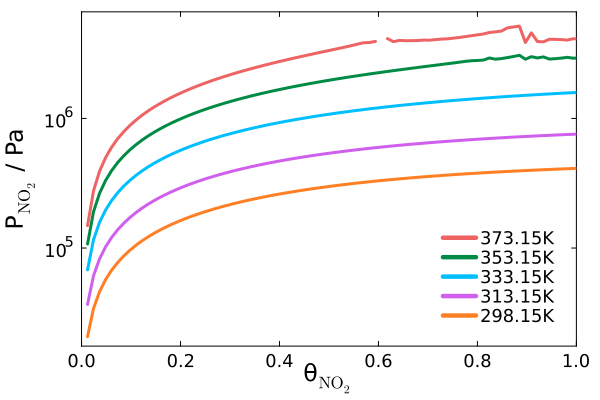

In [21]:
plt = plot(grid = :off, 
      framestyle = :box, 
      foreground_color_legend = nothing, 
      legend_font = font(12),
      xtickfont = font(12),
      ytickfont = font(12),
      yaxis = :log,
      xlims = (0, 1),
      legend =:bottomright,
      left_margin = 4mm,
      right_margin = 4mm,
      xguidefontsize=16,
      yguidefontsize=16)

plot!(plt, loadfil, partialT5, 
      color = "indianred2", 
      line = (:path, 3), 
      label = "373.15K")

plot!(plt, loadfil, partialT4, 
      color = "springgreen4", 
      line = (:path, 3), 
      label = "353.15K")

plot!(plt, loadfil, partialT3, 
      color = "deepskyblue1", 
      line = (:path, 3), 
      label = "333.15K")

plot!(plt, loadfil, partialT2, 
      color = "mediumorchid2", 
      line = (:path, 3), 
      label = "313.15K")

plot!(plt, loadfil, partialT1, 
      color = "chocolate1", 
      line = (:solid, 3), 
      label = "298.15K")

# plot!(plt, [0, 1.2], [10132000, 10132000], 
#       color = :black, 
#       line = (:dash, 2), 
#       label = "Critical Pressure")

xlabel!(plt, "θ"*L"\mathrm{_{NO_2}}")
ylabel!(plt, "P"*L"\mathrm{_{NO_2}}"*" / Pa")

#savefig(plt, "NO2_All_Temps_Loading_298")